# Optimization method : Gradient Descent+fixed step

1) Step: fixed value

2) Search direction : -$\nabla f$ 

The first step consists in defining the algorithms parameters, such as initial point $\mathbf{x}_{(0)}$, $\alpha_{(t)}$ and convergence tolerance constant $\epsilon_{\nabla}$, as well as the function to be minimized and its gradient evaluation:



In [7]:
import numpy as np
from plot_descent import plot_2d_contour, plot_3d_surface
%matplotlib widget
# Problem to be solved and variable for computational cost computation
global problem
cost=0
problem=1
# Initial guess
x=np.array([-1, 3])
k=0
alpha0=.01
# Convergence Tolerance
TolG=1e-6

# Definition of the function to be minimized
def f_obj(x):
    global problem
    if problem==1:
        f = x[0]**2+x[1]**2
        df = np.array([2*x[0], 2*x[1]])
    elif problem==2:
        f=3*x[0]**2+2*x[0]*x[1]+2*x[1]**2+7
        df=np.array([6*x[0]+2*x[1], 2*x[0]+4*x[1]])
    elif problem==3:
        f=10*x[0]**4-20*x[0]**2*x[1]+10*x[1]**2+x[0]**2-2*x[0]+5
        df=np.array([40*x[0]**3-40*x[0]*x[1]+2*x[0]-2, -20*x[0]**2+20*x[1]])
    return f, df

# f and df values at the inital point
f,df=f_obj(x0)

Now, we may start the iterative process for the function minimization using the gradient descent with fixed step method:



In [8]:
points = [x]
values = [f]
while np.sqrt(df @ df)>TolG:
    # Search direction as negative of the gradient
    d=-df
    
    # Step determination
    alpha=alpha0
    
    # Update the current point 
    xk=x+alpha*d
    points.append(xk)

    # Evaluate the objective funciton and gradient at the new point
    [f,df]=f_obj(xk)
    cost += 1
    values.append(f)
    
    # Update the design vairable and iteration number 
    x=xk
    k=k+1

Once the results are obtained, we may print them:

In [9]:
print('Optimum found:')
print(xk)
print('Objective function value at the optimum:')
print(f)

print('Norm of the gradient at the optimum:')
print(np.sqrt(df @ df))
print('Number of times that the f_obj function was evaluated:')
print(cost)
print('Number of iterations for convergence:')
print(k)

Optimum found:
[-1.55394176e-07  4.66182527e-07]
Objective function value at the optimum:
2.4147349876646916e-13
Norm of the gradient at the optimum:
9.82799061388378e-07
Number of times that the f_obj function was evaluated:
776
Number of iterations for convergence:
776


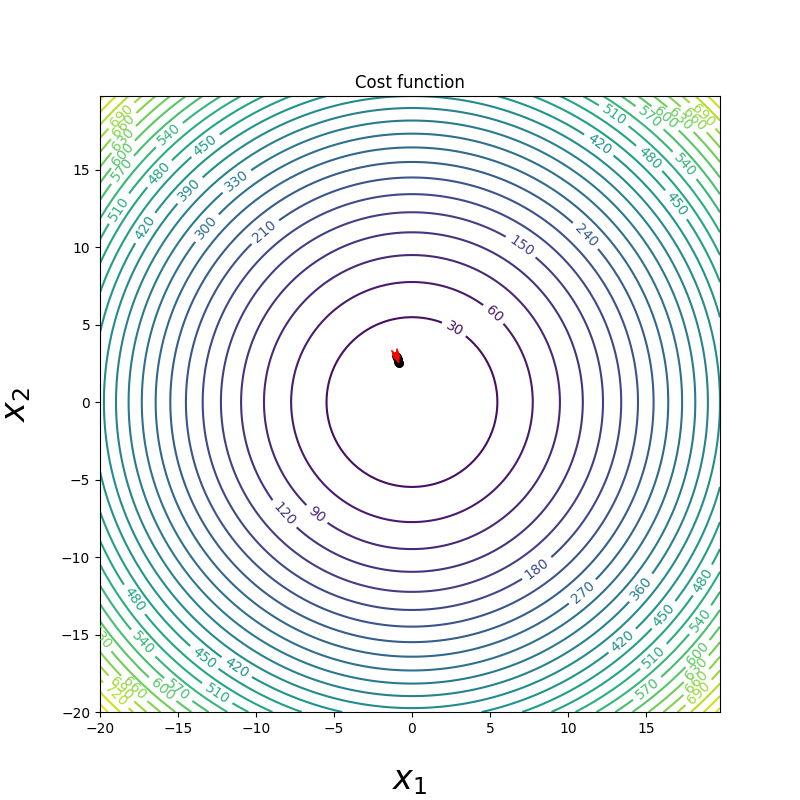

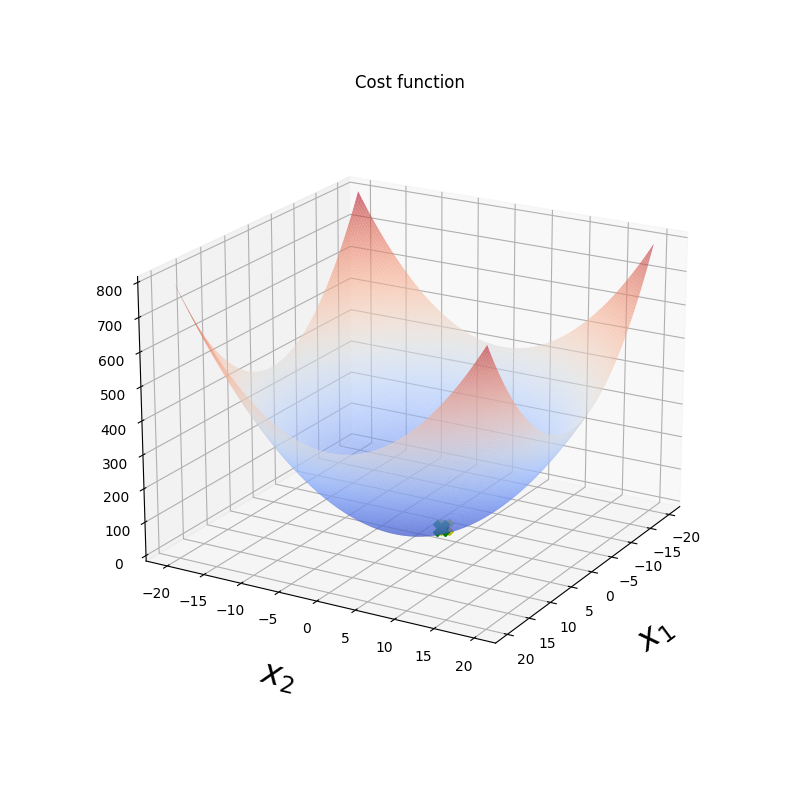

In [10]:
N = 10 # number of points to plot

plot_2d_contour(points[:N], f_obj)
plot_3d_surface(points[:N], values[:N], f_obj)